In [21]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras.datasets import mnist # Набор данных mnist
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Работа с изображениями
from random import randint


Загрузка датасета

In [22]:
# Отрисовывать изображения в колабе
%matplotlib inline

# Загружаем набор данных (датасет) MNIST
(x_train, y_train_original), (x_test, y_test_original) = mnist.load_data()

print("Размер обучающей выборки")
print(x_train.shape)
print()

print("Размер тестовой выборки")
print(x_test.shape)

Размер обучающей выборки
(60000, 28, 28)

Размер тестовой выборки
(10000, 28, 28)


Вывод для примера картинок из x_train и результатов ответов из y_train

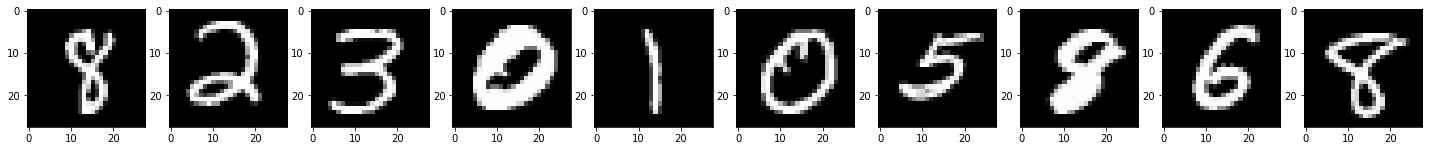


Labels:  8 2 3 0 1 0 5 8 6 8 


In [23]:
# Создаем полотно из 10 графиков
fig, axs = plt.subplots(1, 10, figsize=(25, 3)) 

y = ''
for i in range(10):
  index = randint(0, 60000)
  img = x_train[index] # Выбор из x_train случайного изображения
  y += str(y_train_original[index]) + " " # Запись верного ответа на изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # Добавление изображения в коллекцию

# Вывод изображений
plt.show()

# Вывод верных ответов
print("\nLabels: ", y) 

Превращение y_train и y_test сетей в формат one hot encoding

In [24]:
y_train = utils.to_categorical(y_train_original, 10)
y_test = utils.to_categorical(y_test_original, 10)

print("Обучающая выборка:")
print(y_train_original[5], "->", y_train[5])
print(y_train_original[234], "->", y_train[234])
print(y_train_original[55477], "->", y_train[55477])
print(y_train_original[14848], "->", y_train[14848])
print()

print("Проверочная выборка:")
print(y_train_original[15], "->", y_train[15])
print(y_train_original[334], "->", y_train[334])
print(y_train_original[8477], "->", y_train[8477])
print(y_train_original[3768], "->", y_train[3768])

Обучающая выборка:
2 -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
9 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
6 -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

Проверочная выборка:
7 -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
9 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
4 -> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Преобразование картинок в последовательности цифр (выравнивание)

In [25]:
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

print("Размерность x_train: ", x_train.shape)
print("Размерность x_test: ", x_test.shape)

Размерность x_train:  (60000, 784)
Размерность x_test:  (10000, 784)


Нормализация картинок приведение значения пикселя в диапозоно от о до 1:

In [26]:
print("Изначальные значения:")
print(x_train[10][120:135]) #120:135 - вывод значений из опр. диапозона
print()

x_train = x_train / 255
x_test = x_test / 255

print("Значения после нормализации:")
print(x_train[10][120:135])

Изначальные значения:
[  0   0   0  42 118 219 166 118 118   6   0   0   0   0   0]

Значения после нормализации:
[0.         0.         0.         0.16470588 0.4627451  0.85882353
 0.65098039 0.4627451  0.4627451  0.02352941 0.         0.
 0.         0.         0.        ]


Создание структуры нейросети

In [27]:
# Задаём batch_size. # Кол. эл. выборки, с которыми будут учиться до изменения весов.
batch_size = 128 

# Создание последовательной модели нейронной сети
model = Sequential()
# Выравнивающий слой
model.add(Dense(784, input_dim=784, activation='relu'))
# Полносвязный скрытый слой
model.add(Dense(128, activation='relu'))
# Слой классификации
model.add(Dense(10, activation='softmax'))

# Компиляция сети
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

# Вывод структуры нейросети
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 784)               615440    
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


Обучение нейросети

In [28]:
history = model.fit(x_train,
                    y_train, 
                    batch_size=batch_size, 
                    epochs=25,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/25
375/375 [==============================] - 2s 4ms/step - loss: 0.2419 - accuracy: 0.9294 - val_loss: 0.1242 - val_accuracy: 0.9628
Epoch 2/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0886 - accuracy: 0.9734 - val_loss: 0.0991 - val_accuracy: 0.9705
Epoch 3/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0547 - accuracy: 0.9826 - val_loss: 0.0887 - val_accuracy: 0.9725
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0364 - accuracy: 0.9880 - val_loss: 0.0942 - val_accuracy: 0.9728
Epoch 5/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0889 - val_accuracy: 0.9766
Epoch 6/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.0900 - val_accuracy: 0.9769
Epoch 7/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0168 - accuracy: 0.9941 - val_loss: 0.0877 - val_accuracy: 0.9776
Epoch 

Вывод графика точности обучения

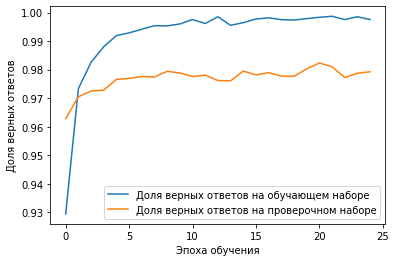

In [29]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Тест нейросети на изображении из тестовой выборки

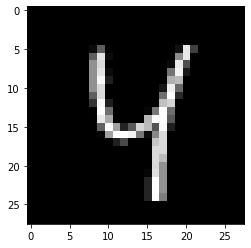

Выход сети:
[7.7280200e-16 2.1201643e-11 8.5997111e-17 3.8129446e-15 1.0000000e+00
 5.2070896e-14 2.8318635e-16 7.7338465e-12 1.8893467e-10 9.5265520e-09]

0 -> 0.0000000000000007728019973118080507973326
1 -> 0.0000000000212016428718930782792995159980
2 -> 0.0000000000000000859971110825813759778735
3 -> 0.0000000000000038129446465701242324763953
4 -> 1.0000000000000000000000000000000000000000
5 -> 0.0000000000000520708964227983850392433851
6 -> 0.0000000000000002831863547336028932160934
7 -> 0.0000000000077338465492848840199258120265
8 -> 0.0000000001889346734618158052398939616978
9 -> 0.0000000095265519917120400350540876388550

Распознанная цифра:  4
Верный ответ:  4


In [30]:
# Подача в нейросеть всех картинок из тестовой выборки
prediction = model.predict(x_test)

# Номер для примера
n = 2022

# Вывод картинки
img = x_test[n]
img = img*255 # Возращаение изображения в ненормализованный вид
img = img.reshape(28, 28)
img = img.astype('uint8')
plt.imshow(Image.fromarray(img), cmap='gray') #Отображение изображения
plt.show()


print("Выход сети:")
print(prediction[n])
print()
for i in range(10):
  print(i,"->","{:.40f}".format(prediction[n][i]))
print()
print("Распознанная цифра: ", np.argmax(prediction[n]))
print("Верный ответ: ", np.argmax(y_test[n]))

Тест нейросети на изображении с пк

In [31]:
def showImage(array_img):
  array_img = array_img.astype('uint8') # Меняем тип на однобайтовый без знака
  img = Image.fromarray(array_img)      # Переводим массив в изображение
  img = img.convert('RGBA')             # Конвертируем в нужное цветовое представление
  plt.imshow(img)                       # Отрисовываем картинку
  plt.show()                            # Выводим картинку

def isPortraitFormat(width: int, height: int):
  if height > width:
    return True
  else:
    return False

def smart_crop(img, target_h, target_w):
  img_w, img_h = img.size                 # Сохраняем размер картинки

  # Проверка на формат и сжатие
  if isPortraitFormat(img_w, img_h):
    new_w = target_w                       # Подстраиваемся под ширину
    new_h = round(new_w / img_w * img_h)  # Рассчитываем приблизительную высоту

  else:
    new_h = target_h                      # Подстраиваемся под высоту
    new_w = round(new_h / img_h * img_w)  # Рассчитываем приблизительную ширину

  img = img.resize((new_w, new_h), Image.ANTIALIAS) # Применяем первые изменения

                                        # Обрезка лишнего

  # Находим координаты центра сжатой картинки
  center_w = new_w // 2
  center_h = new_h // 2

  # Находим левую верхнюю точку для прямоугольной обрезки
  top_left_w = center_w - target_w // 2
  top_left_h = center_h - target_h // 2

  # Находим правую нижняя точку для прямоугольной обрезки
  bottom_right_w = center_w + target_w // 2
  bottom_right_h = center_h + target_h // 2

  # Обрезаем изображение прямоугольной областью по заданным координатам
  img = img.crop((top_left_w, top_left_h, bottom_right_w, bottom_right_h))

  return img

Saving Image_to_recognize2_28X28.png to Image_to_recognize2_28X28.png


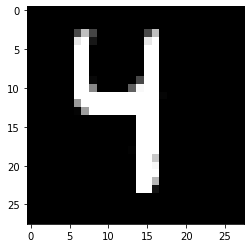

Выход сети:
Распознанная цифра:  {4}
Верный ответ: 
0 -> 0.0000000000000000000000000000000000000000
1 -> 0.0000000000000000000000000000000000000000
2 -> 0.0000000000000000000000000000000000000000
3 -> 0.0000000000000000000000000000000000000000
4 -> 1.0000000000000000000000000000000000000000
5 -> 0.0000000000000000000000000000000000000000
6 -> 0.0000000000000000000000000000000000000000
7 -> 0.0000000000000000000000000000000000000000
8 -> 0.0000000000000000000000000000000000000000
9 -> 0.0000000000000000000000000000000000000000


In [32]:
# Подключаем библиотеку для загрузки файлов
from google.colab import files

# Загружаем картинку
img = files.upload()

# Достаём только первую картинку
img = Image.open(list(img.keys())[0])

img = img.convert('L')
img = smart_crop(img, 28, 28)

# Преобразуем изображение в массив

w, h = img.size[0], img.size[1]
img = np.array(img)

# for y in range(h):
#   for x in range(w):
#     img[y][x] = 255 - img[y][x]

# Подаем изображение в нейросеть
img = img.reshape(1, 784) # Преобразуем в 1м массив, чтобы подать его в нейросеть
prediction = model.predict(img)

img = img.reshape(28, 28) # Вернём в 2х мерный вид
showImage(img) # Покажем изображение, что было обработано нейросетью

print("Выход сети:")
print(f"Распознанная цифра: ", {np.argmax(prediction[0])})
print("Верный ответ: ")

for i in range(10):
  print(i, "->", "{:.40f}".format(prediction[0][i]))


Поиск ошибок в работе нейросети

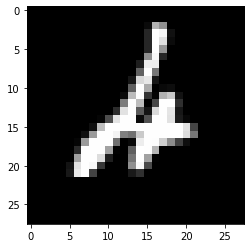

Распознанная цифра: 2
Верный ответ: 4



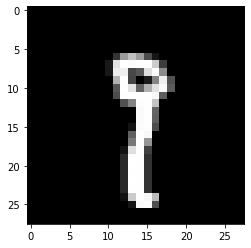

Распознанная цифра: 8
Верный ответ: 9



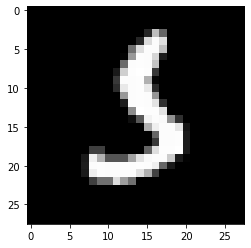

Распознанная цифра: 3
Верный ответ: 5



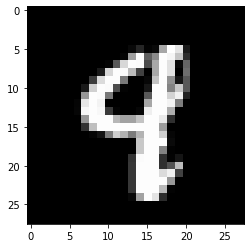

Распознанная цифра: 8
Верный ответ: 9



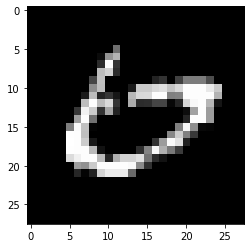

Распознанная цифра: 0
Верный ответ: 6



In [35]:
# Преобразуем картинки тестовой выборки в последовательности цифр (выравнивание)

x_test = x_test.reshape(x_test.shape[0], 28*28)

# Загрузка тестовой выборки для теста
prediction = model.predict(x_test)

mistakesCounter = 0
for i in range(prediction.shape[0]): #Пока мы находимся в диапозоне изображений тестовой выборки
  # Находим первые 5 ошибок
  if mistakesCounter < 5:
    if np.argmax(prediction[i]) != np.argmax(y_test[i]): # Если н.с. говорит, что с наибольшей вероятностью это одно, но в ответе записано другое, то
      mistakesCounter += 1 # увеличить количество ошибок на 1

      # Показываем ошибку
      img = x_test[i] # Картинки в x_test нормализованы. Значения пикселей в диапозоне от о до 1.
      img = img*255 # Нормализируем к диапозону 0 - 255
      img = img.reshape(28, 28) #Первращаем в 2х мерный массив
      img = img.astype('uint8')
      plt.imshow(Image.fromarray(img), cmap='gray')
      plt.show()

      # Выводим разницу распознанного и правильного ответов
      print(f'Распознанная цифра: {np.argmax(prediction[i])}')
      print(f'Верный ответ: {np.argmax(y_test[i])}', end='\n\n')
      
  else: break #Прекращаем искать ошибки
